# AirNow data reading

In [2]:
import pyaerocom as pya
import os
import csv
from glob import glob
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import numpy as np

In [3]:
path = '/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/MACC_INSITU_AirNow'

#### using pandas: reading all the files will take more than 3 hours

In [5]:
#list all available directories
dirs = [os.path.join(path, o) for o in os.listdir(path) if os.path.isdir(os.path.join(path,o))]

#initialize empty dataframe
data = pd.DataFrame()

#loop over directories
for i in range(len(dirs)):
    #loop over files
    files = glob(os.path.join(path, dirs[i], '*.dat'))
    #for j in tqdm(range(len(files))):
    for j in tqdm(range(2)):
        fn = os.path.join(path,dirs[i],files[j])
        data = data.append(pd.read_csv(fn,sep='|',names=['mm/dd/yy','hh:mm','station_id','station_name','time_zone','variable','unit','value','Institute']))
        
#create datetimeindex
data['datetime'] = pd.to_datetime(data.apply(lambda row: datetime(year=2000+int(row['mm/dd/yy'].split('/')[2]),month=int(row['mm/dd/yy'].split('/')[0]),day=int(row['mm/dd/yy'].split('/')[1]),hour=int(row['hh:mm'].split(':')[0]),minute=int(row['hh:mm'].split(':')[1])), axis=1))
data = data.sort_values(by='datetime')
#drop yy/mm/dd and hh:mm columns
data.drop(columns=['mm/dd/yy','hh:mm'], inplace=True)
data.head()

100%|██████████| 2/2 [00:00<00:00,  2.22it/s]


,station_id,station_name,time_zone,variable,unit,value,Institute,datetime
13988,560130099,South Pass,-7.0,PM2.5,UG/M3,0.0,Wyoming Department of Environmental Quality,2020-01-16 12:00:00
4862,023604010,JPN Site 023604010,9.0,NO,PPB,0.0,Japan Ministry of Environment,2020-01-16 12:00:00
4861,023501010,JPN Site 023501010,9.0,NOX,PPB,30.0,Japan Ministry of Environment,2020-01-16 12:00:00
4860,023501010,JPN Site 023501010,9.0,NO2,PPB,23.0,Japan Ministry of Environment,2020-01-16 12:00:00
4859,023501010,JPN Site 023501010,9.0,NO,PPB,7.0,Japan Ministry of Environment,2020-01-16 12:00:00


In [8]:
data.head(20)

,station_id,station_name,time_zone,variable,unit,value,Institute,datetime
13988,560130099,South Pass,-7.0,PM2.5,UG/M3,0.0,Wyoming Department of Environmental Quality,2020-01-16 12:00:00
4862,023604010,JPN Site 023604010,9.0,NO,PPB,0.0,Japan Ministry of Environment,2020-01-16 12:00:00
4861,023501010,JPN Site 023501010,9.0,NOX,PPB,30.0,Japan Ministry of Environment,2020-01-16 12:00:00
4860,023501010,JPN Site 023501010,9.0,NO2,PPB,23.0,Japan Ministry of Environment,2020-01-16 12:00:00
4859,023501010,JPN Site 023501010,9.0,NO,PPB,7.0,Japan Ministry of Environment,2020-01-16 12:00:00
4858,023481010,JPN Site 023481010,9.0,NOX,PPB,45.0,Japan Ministry of Environment,2020-01-16 12:00:00
4857,023481010,JPN Site 023481010,9.0,NO2,PPB,29.0,Japan Ministry of Environment,2020-01-16 12:00:00
4856,023481010,JPN Site 023481010,9.0,NO,PPB,16.0,Japan Ministry of Environment,2020-01-16 12:00:00
4855,023447010,JPN Site 023447010,9.0,WS,M/S,0.8,Japan Ministry of Environment,2020-01-16 12:00:00
4854,023447010,JPN Site 023447010,9.0,WD,DEGREES,22.5,Japan Ministry of Environment,2020-01-16 12:00:00


In [7]:
np.unique(data['variable'].values)

array(['BARPR', 'BC', 'CO', 'NH3', 'NO', 'NO2', 'NO2Y', 'NOX', 'NOY',
       'OZONE', 'PM10', 'PM2.5', 'PRECIP', 'RHUM', 'RWD', 'RWS', 'SO2',
       'SRAD', 'TEMP', 'UV-AETH', 'WD', 'WS'], dtype=object)

#### using dask: it takes 3 min, but returns errors when computing apply operations

In [4]:
'''
#list all files
all_files = []
for i in range(len(dirs)):
#for i in range(1):
    #loop over files
    files = glob(os.path.join(path, dirs[i], '*.dat'))
    all_files.extend(files)

#read them with dask
import dask.dataframe as dd
%time data = dd.read_csv(all_files,sep='|',names=['mm/dd/yy','hh:mm','station_id','station_name','flag','variable','unit','value','Institute'])

#create datetimeindex
data['datetime'] = pd.to_datetime(data.apply(lambda row: datetime(year=2000+int(row['mm/dd/yy'].split('/')[2]),month=int(row['mm/dd/yy'].split('/')[0]),day=int(row['mm/dd/yy'].split('/')[1]),hour=int(row['hh:mm'].split(':')[0]),minute=int(row['hh:mm'].split(':')[1])), axis=1, meta=pd.DataFrame))
#error: NotImplementedError: Series getitem in only supported for other series objects with matching partition structure
'''

"\n#list all files\nall_files = []\nfor i in range(len(dirs)):\n#for i in range(1):\n    #loop over files\n    files = glob(os.path.join(path, dirs[i], '*.dat'))\n    all_files.extend(files)\n\n#read them with dask\nimport dask.dataframe as dd\n%time data = dd.read_csv(all_files,sep='|',names=['mm/dd/yy','hh:mm','station_id','station_name','flag','variable','unit','value','Institute'])\n\n#create datetimeindex\ndata['datetime'] = pd.to_datetime(data.apply(lambda row: datetime(year=2000+int(row['mm/dd/yy'].split('/')[2]),month=int(row['mm/dd/yy'].split('/')[0]),day=int(row['mm/dd/yy'].split('/')[1]),hour=int(row['hh:mm'].split(':')[0]),minute=int(row['hh:mm'].split(':')[1])), axis=1, meta=pd.DataFrame))\n#error: NotImplementedError: Series getitem in only supported for other series objects with matching partition structure\n"

#### check what the data looks like

/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'New Delhi')

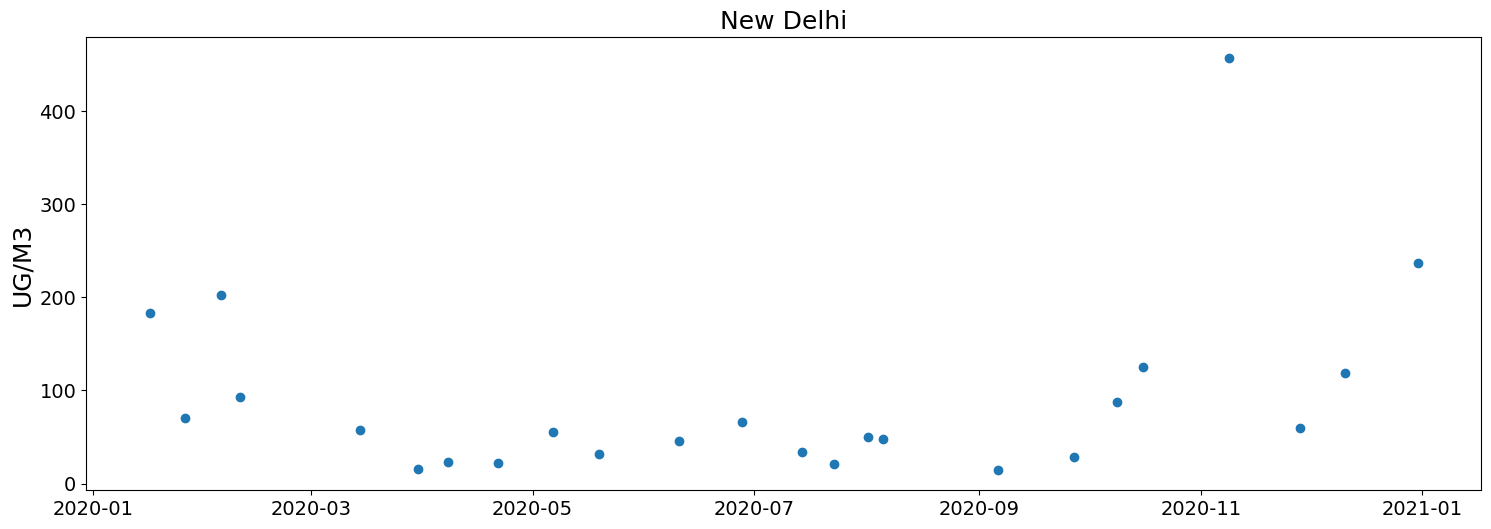

In [5]:
#plot some time series
import matplotlib.pyplot as plt

var = 'PM2.5'
station_name = 'New Delhi'
sub_data = data.loc[(data['variable'] == var) & (data['station_name'] == station_name)]

fig=plt.figure(figsize=(18,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(sub_data['datetime'],sub_data['value'],'o')
plt.ylabel(sub_data['unit'].values[0])
plt.title(sub_data['station_name'].values[0])

### Opens configuration file

In [6]:
#todo: open list of station and add coordinates
fn = os.path.join(path,'allStations_20191224.csv')
cfg = pd.read_csv(fn,sep=',', converters={'aqsid': lambda x: str(x)})
cfg.head()

,aqsid,name,lat,lon,elevation,city,address,position,timezone,environment,modificationdate,populationclass,comment
0,000010101,Duckworth & Ordinance,47.568,-52.702,7.0,St. John's,A1C 1E4,POINT (-52.70222 47.56806),America/St_Johns,Commercial,2015-10-20 20:30:42,urban,NaN
1,000010102,St. John's,47.560,-52.711,6.0,St. John's,354 WATER STREET,POINT (-52.7113888889 47.56),America/St_Johns,Commercial,2015-05-05 19:31:40,urban,NaN
2,000010301,Credit Union,48.951,-57.945,9.0,Corner Brook,BROOK STREET,POINT (-57.9452777778 48.9511111111),America/St_Johns,Commercial,2015-04-29 21:33:43,urban,NaN
3,000010401,Mount Pearl,47.505,-52.795,135.0,Mount Pearl,OLD PLACENTIA ROAD,POINT (-52.7947611111 47.5051277778),America/St_Johns,Residential,2015-04-29 21:33:43,urban,NaN
4,000010501,Grand Falls - Windsor,48.927,-55.660,62.0,Grand Falls - Windsor,SCOTT AVENUE,POINT (-55.6597222222 48.9269444444),America/St_Johns,Commercial,2015-05-05 19:32:18,urban,NaN


#### Fill data df with config

In [7]:
#in order to merge database, set common index with station id
data.set_index('station_id', inplace=True)
cfg.rename(columns={'aqsid': 'station_id'},inplace=True)
cfg.set_index('station_id',inplace=True)

In [8]:
data_cfg = data.join(cfg, how='inner')
data_cfg.reset_index(inplace=True)
print(len(data),len(data_cfg))
data_cfg.head()

302705 115485


,station_id,station_name,time_zone,variable,unit,value,Institute,datetime,name,lat,lon,elevation,city,address,position,timezone,environment,modificationdate,populationclass,comment
0,000010102,St. John's,-4.0,OZONE,PPB,5.0,Newfoundland & Labrador DEC,2020-01-16 12:00:00,St. John's,47.56,-52.711,6.0,St. John's,354 WATER STREET,POINT (-52.7113888889 47.56),America/St_Johns,Commercial,2015-05-05 19:31:40,urban,NaN
1,000010102,St. John's,-4.0,OZONE,PPB,32.0,Newfoundland & Labrador DEC,2020-01-26 08:00:00,St. John's,47.56,-52.711,6.0,St. John's,354 WATER STREET,POINT (-52.7113888889 47.56),America/St_Johns,Commercial,2015-05-05 19:31:40,urban,NaN
2,000010102,St. John's,-4.0,OZONE,PPB,30.0,Newfoundland & Labrador DEC,2020-02-05 01:00:00,St. John's,47.56,-52.711,6.0,St. John's,354 WATER STREET,POINT (-52.7113888889 47.56),America/St_Johns,Commercial,2015-05-05 19:31:40,urban,NaN
3,000010102,St. John's,-4.0,OZONE,PPB,13.0,Newfoundland & Labrador DEC,2020-02-10 07:00:00,St. John's,47.56,-52.711,6.0,St. John's,354 WATER STREET,POINT (-52.7113888889 47.56),America/St_Johns,Commercial,2015-05-05 19:31:40,urban,NaN
4,000010102,St. John's,-4.0,OZONE,PPB,40.0,Newfoundland & Labrador DEC,2020-03-14 13:00:00,St. John's,47.56,-52.711,6.0,St. John's,354 WATER STREET,POINT (-52.7113888889 47.56),America/St_Johns,Commercial,2015-05-05 19:31:40,urban,NaN


#### explore a little bit more the data

In [9]:
var = 'PM2.5'
sub_data = data_cfg.loc[data_cfg['variable']==var]
sub_data.drop(columns=['Institute','name','address','position','timezone','environment','modificationdate','populationclass','comment'], inplace=True)

/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
from keplergl import KeplerGl
kepler_map = KeplerGl(height = 800, data={var: sub_data})
kepler_map

KeplerGl(data={'PM2.5':        station_id      station_name  time_zone variable   unit  value  \
24      00001…

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


#### Look what the xls files look like

In [9]:
fn = os.path.join(path,'StationsNAPS-StationsSNPA.xlsx')
cfg2 = pd.read_excel(fn,engine='openpyxl')
cfg2.head()

,NAPS_ID,Station_Name,Status,Location_Address,City,P/T,Postal_Code,Timezone,Latitude,Longitude,...,Urbanization,Neighbourhood,Land_Use,Scale,PC,CD,CSD,CMA/CA,AQMS_Airzone,Core_Site
0,Identifiant_SNPA,Nom de la station,Statut,Emplacement_Address,Ville,P/T,Code_postal,Fuseau_horaire,Latitude,Longitude,...,Urbanisation,Quartier,Utilisation_du_sol,Échelle,PC,CD,CSD,CMA/CA,SGQA_zones_atmosphérique,Sites_principaux
1,10101,Duckworth & Ordinance,0,Duckworth & Ordinance,St. John's,NL,A1C 1E4,-3.5,47.5681,-52.7022,...,LU,P4,W,na,St. John's (N.L),01. Division No. 1,"St. John's, CY 01 519","001. St. John's, CMA/RMR",Newfoundland,NaN
2,10102,Water Street Post Office,1,354 Water Street,St. John's,NL,A1C 1C4,-3.5,47.5604,-52.7115,...,LU,P4,R,MD,St. John's (N.L),01. Division No. 1,"St. John's, CY 01 519","001. St. John's, CMA/RMR",Newfoundland,2
3,10201,Cormack,0,Cormack,Cormack,NL,A0K 2E0,-3.5,49.2621,-57.4546,...,NU,P1,F,na,Deer Lake (N.L.),05. Division No. 5,"Cormack, T 05 014","015. Corner Brook, CA/AR",Newfoundland,NaN
4,10301,Credit Union,0,Brook Street,Corner Brook,NL,A2H 2T7,-3.5,48.9495,-57.9454,...,SU,P3,I,na,Corner Brook (N.L.),05. Division No. 5,"Corner Brook, CY 05 018","015. Corner Brook, CA/AR",Newfoundland,NaN


In [10]:
fn = os.path.join(path,'Stations2017_v3.xlsx')
cfg3 = pd.read_excel(fn,engine='openpyxl')
cfg3.head()

,NAPS_ID,STATION_NAME,STATUS,STREET_ADDRESS,CITY,PROVINCE,Postal_Code,TimeZone,Lat_Decimal,Long_Decimal,...,LU400m_C,Combined_Stations,NAPS_C,SCALE,Population Ctr,CENSUS_DIVISION,CENSUS_SUBDIVISION,CENSUS_AGGLOMERATION/ METROPOLITAN_AREA,AirShed,CoreSite
0,10101.0,DUCKWORTH & ORDINANCE,0.0,DUCKWORTH & ORDINANCE,ST. JOHN'S,NEWFOUNDLAND AND LABRADOR,A1C 1E4,-3.5,47.568060,-52.702220,...,W,NaN,"PE,LU,P4,W",na,St. John's (N.L),01. Division No. 1,"St. John's, CY 01 519","001. St. John's, CMA/RMR",Newfoundland,NaN
1,10102.0,WATER STREET POST OFFICE,1.0,354 WATER STREET,ST. JOHN'S,NEWFOUNDLAND AND LABRADOR,A1C 1C4,-3.5,47.560380,-52.711470,...,R,NaN,"PE,LU,P4,R",MD,St. John's (N.L),01. Division No. 1,"St. John's, CY 01 519","001. St. John's, CMA/RMR",Newfoundland,2.0
2,10201.0,CORMACK,0.0,CORMACK,CORMACK,NEWFOUNDLAND AND LABRADOR,A0K 2E0,-3.5,49.262120,-57.454570,...,F,NaN,"RB,NU,P1,F",na,Deer Lake (N.L.),05. Division No. 5,"Cormack, T 05 014","015. Corner Brook, CA/AR",Newfoundland,NaN
3,10301.0,CREDIT UNION,0.0,BROOK STREET,CORNER BROOK,NEWFOUNDLAND AND LABRADOR,A2H 2T7,-3.5,48.949479,-57.945387,...,I,NaN,"PE,SU,P3,I",na,Corner Brook (N.L.),05. Division No. 5,"Corner Brook, CY 05 018","015. Corner Brook, CA/AR",Newfoundland,NaN
4,10400.0,CENTRAL NEWFOUNDLAND,0.0,AFB GANDER,GANDER,NEWFOUNDLAND AND LABRADOR,A2B 1C6,-3.5,48.942870,-54.557530,...,C,NaN,"PE,SU,P2,C",na,Gander (N.L.),06. Division No. 6,"Gander, T 06 009","011. Gander, CA/AR",Newfoundland,NaN
